# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
import numpy as np
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

In [2]:
binary = True
remove = []
remove = [2,3,4,5,6,7,8,9]
minority_id = [0]
split = 0.1
ratio = None
data_clf = data.get_real_dataset(
    'MNIST', scale=False, binary=binary, classes_remove=remove, minority_id=minority_id,
    split=split, ratio=ratio, equal_test=True)
# print(len(data_clf['data']['y']))
# print(sum(data_clf['data']['y']))
# import numpy as np
# print(np.unique(data_clf['data']['y']))
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

12665 5923
MNIST: 11928
Number of attribues: 784
Classes total: 6005 - 5923

Classes train: 674 - 592
Classes test:  5331 - 5331


In [3]:
print(np.unique(data_clf['data']['y']))
print(np.unique(data_clf['data_test']['y']))

[0 1]
[0 1]


## Get Classifier

In [4]:
epochs = 5
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model='MNIST',
                      binary=True,
                      epochs=epochs,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

for clf in ['Baseline', 'SMOTE']:
    print(clf, ':')
    classifiers_dict[clf].test(data_clf['data']['X'],
                            data_clf['data']['y'], data_s='train')
    classifiers_dict[clf].test(data_clf['data_test']['X'],
                            data_clf['data_test']['y'], data_s='test ')

Baseline :
train set: Accuracy: 0.9976303317535545
test  set: Accuracy: 0.9954980303882949
SMOTE :
train set: Accuracy: 0.9992101105845181
test  set: Accuracy: 0.99699868692553


## Fit deltas

In [5]:
classifiers_dict['Baseline'].test(data_clf['data']['X'],
                           data_clf['data']['y'], data_s='train')

train set: Accuracy: 0.9976303317535545


Original Data


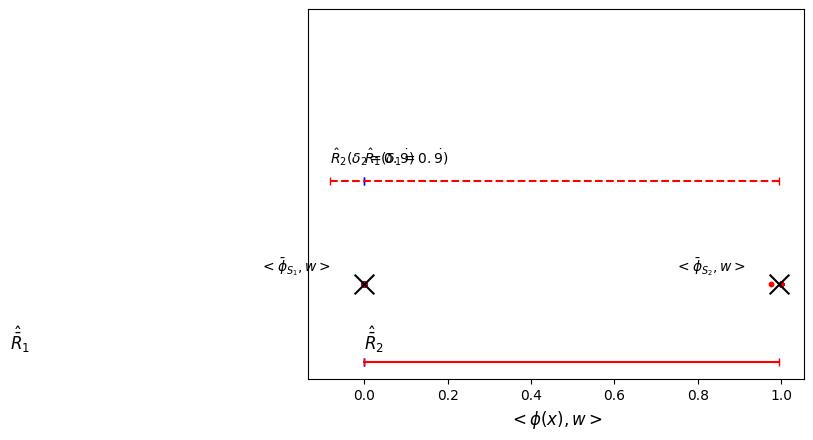

Trying random downsampling deltas (multiprocessing batches of 26):   0%|          | 0/24 [00:00<?, ?it/s]/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in 

In [6]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=False, 
                                                     _plot=True,
                                                    #  method='supports-prop-update_mean',
                                                     method='supports-prop-update_mean-margin_only',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

In [7]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [8]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
            Accuracy    G-Mean   ROC-AUC        F1
Method                                            
Baseline    0.995498  0.995490  0.995498  0.995480
SMOTE       0.996999  0.996998  0.996999  0.996995
BMR         0.996436  0.996433  0.996436  0.996427
Threshold   0.996717  0.996715  0.996717  0.996711
Our Method  0.995498  0.995490  0.995498  0.995480 


Baseline


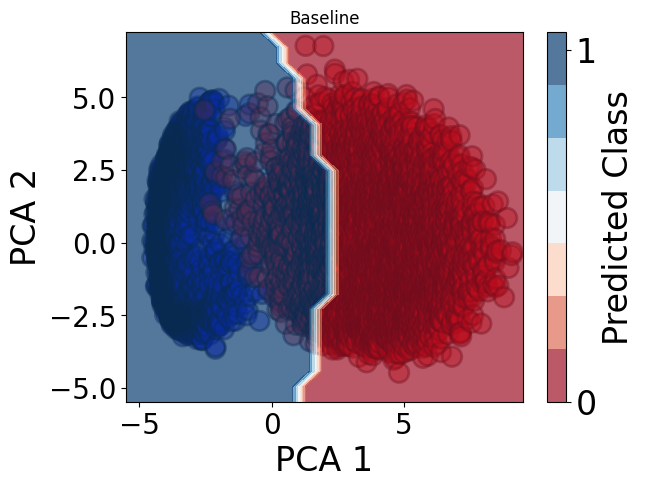

SMOTE


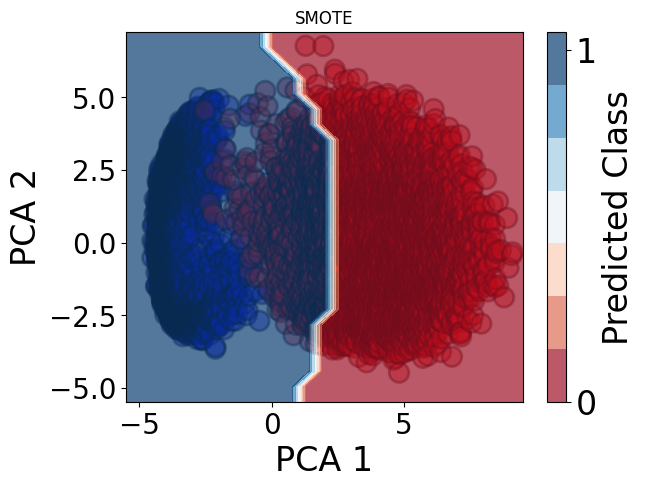

BMR


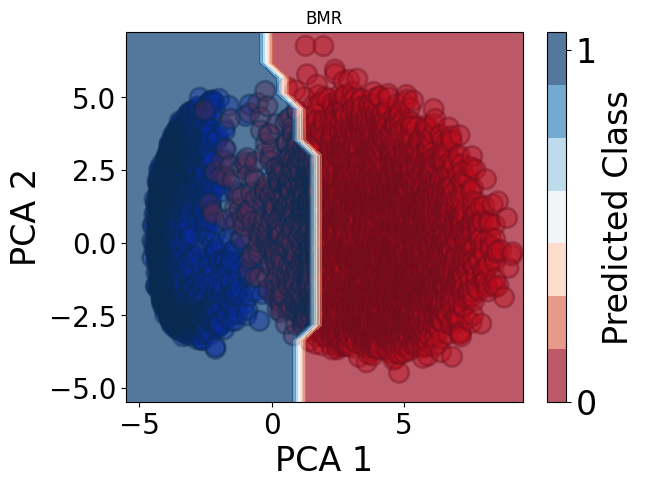

Threshold


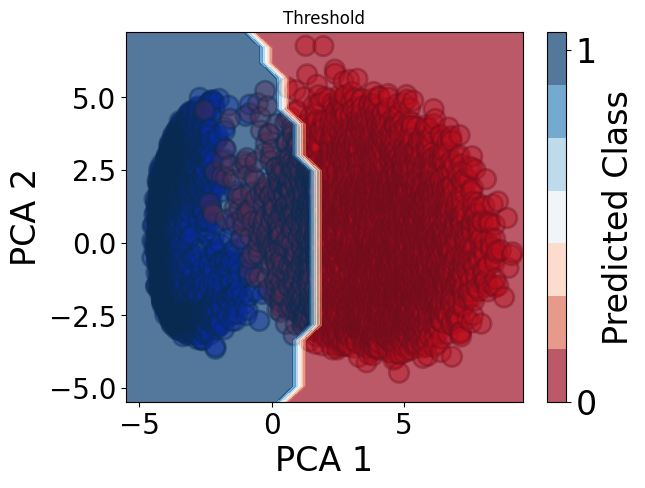

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


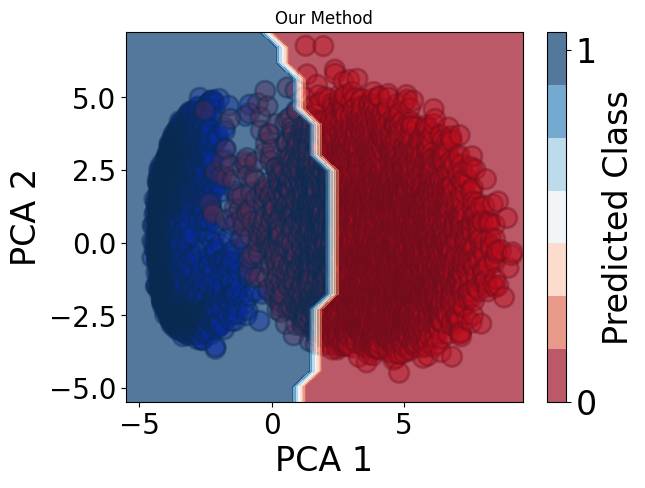

Giving bias from original classifier


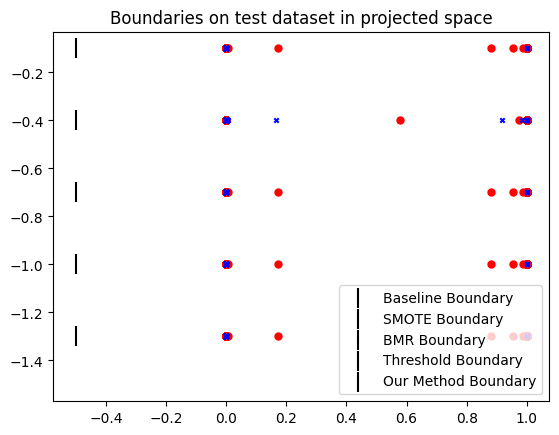

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9955 & 0.9955 & 0.9955 & 0.9955 \\
SMOTE & 0.9970 & 0.9970 & 0.9970 & 0.9970 \\
BMR & 0.9964 & 0.9964 & 0.9964 & 0.9964 \\
Threshold & 0.9967 & 0.9967 & 0.9967 & 0.9967 \\
Our Method & 0.9955 & 0.9955 & 0.9955 & 0.9955 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.995498,0.995490,0.995498,0.995480
SMOTE,0.996999,0.996998,0.996999,0.996995
BMR,0.996436,0.996433,0.996436,0.996427
Threshold,0.996717,0.996715,0.996717,0.996711
Our Method,0.995498,0.995490,0.995498,0.995480


In [9]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])